In [3]:
import json
import numpy as np
import gurobipy
import preference_models_utils
from gurobipy import Model, GRB, quicksum
import pandas as pd
import networkx as nx
import plotly.express as px
import utils

from preference_models_utils import create_planning, create_tables, dominate, ModelDataSommePonderee, get_preorder, create_graph, run_model_uta, PrometheeI

In [5]:
toy_solutions = utils.load_output("solutions/toy_instance_solution.json.gz")
solutions = utils.filter_solutions(toy_solutions)

In [21]:
dim = 3
filtered_solutions = np.empty((len(solutions), dim))
for idx, solution in enumerate(solutions):
    filtered_solutions[idx, :] = [solution.f1, solution.f2, solution.f3]

In [23]:
df_solutions = pd.DataFrame(-1*np.array(filtered_solutions))
df_solutions.rename(columns={0: 'f1', 1: 'f2', 2:'f3'}, inplace=True)

In [25]:
df_solutions

,f1,f2,f3
0,-0.0,-0.0,-0.0
1,20.0,-1.0,-1.0
2,37.0,-2.0,-1.0
3,49.0,-3.0,-1.0
4,59.0,-4.0,-1.0
5,30.0,-1.0,-2.0
6,55.0,-2.0,-2.0
7,65.0,-3.0,-2.0
8,42.0,-1.0,-3.0
9,65.0,-2.0,-3.0


### UTA

In [26]:
ranking = [
    9,
    3,
    1
]
choices = df_solutions[['f1', 'f2', 'f3']].copy().to_numpy()

In [27]:
model_uta, data_uta = run_model_uta(choices, ranking)
df_solutions_uta = df_solutions.copy()
df_solutions_uta['scores'] = data_uta.scores

Set parameter Username
Academic license - for non-commercial use only - expires 2024-01-12
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored


In [28]:
df_solutions_uta.sort_values(by='scores', ascending=False)

,f1,f2,f3,scores
7,65.0,-3.0,-2.0,1.911667
9,65.0,-2.0,-3.0,1.910000
4,59.0,-4.0,-1.0,1.737949
6,55.0,-2.0,-2.0,1.624359
3,49.0,-3.0,-1.0,1.450641
8,42.0,-1.0,-3.0,1.242692
2,37.0,-2.0,-1.0,1.104872
5,30.0,-1.0,-2.0,0.898590
1,20.0,-1.0,-1.0,0.612949
0,-0.0,-0.0,-0.0,0.040000


### Weighted sum

,f1,f2,f3,degree
7,65.0,-3.0,-2.0,8
9,65.0,-2.0,-3.0,8
4,59.0,-4.0,-1.0,4
6,55.0,-2.0,-2.0,4
3,49.0,-3.0,-1.0,1
8,42.0,-1.0,-3.0,-1
2,37.0,-2.0,-1.0,-3
5,30.0,-1.0,-2.0,-5
1,20.0,-1.0,-1.0,-7
0,-0.0,-0.0,-0.0,-9


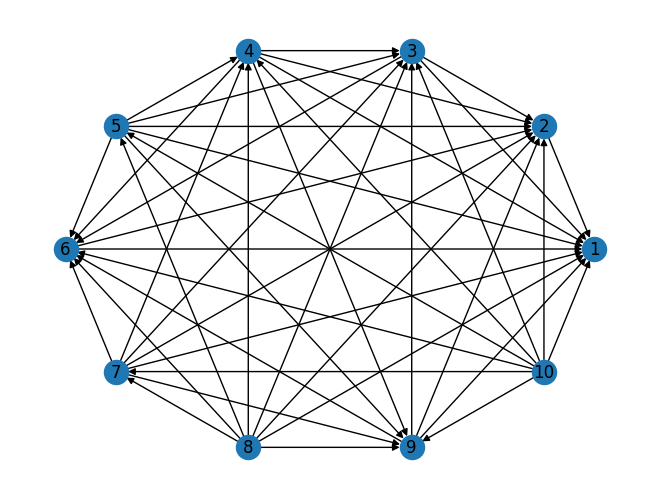

In [32]:
preference_list = [
    (9,   3),
    (9,   1),
    (3,   1),
]

#choices = filtered_solutions.copy()
choices = df_solutions[:10][['f1', 'f2', 'f3']].copy().to_numpy()
preordre_model, preordre_data = get_preorder(choices, preference_list)

G = create_graph(preordre_data, True)
#df_solutions['degree'] =  [G.out_degree(node) - G.in_degree(node) for node in G.nodes] 
df_solutions_wsum = df_solutions[:10].copy()
df_solutions_wsum['degree'] = [G.out_degree(node) - G.in_degree(node) for node in G.nodes]  
df_solutions_wsum.sort_values(by='degree', ascending=False)

#### Outranking: PROMETHEE I

In [33]:
W = [x.X for x in preordre_data.Poids.values()]
S = [20, 1, 2]
config_params = {
    "dim": 3,
    "W": W,
    "S": S,
    "choices": choices
}

promethee = PrometheeI(**config_params)

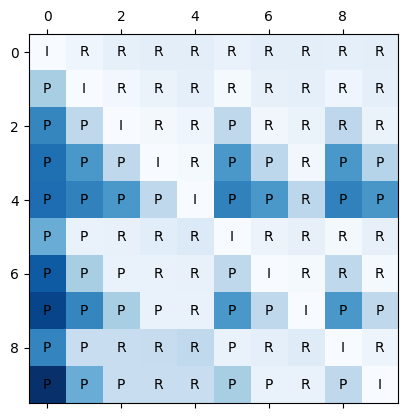

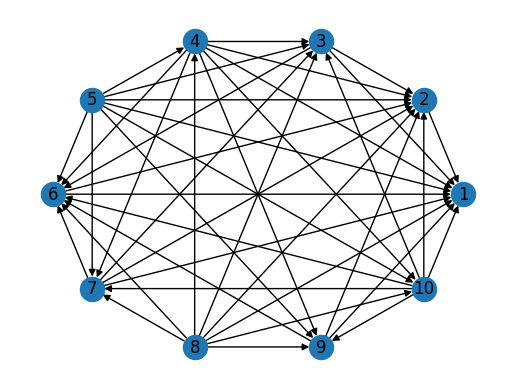

In [34]:
promethee.get_preorder()
promethee.plot_preferences()
promethee.plot_graph()